In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
X = diabetes.data
y = diabetes.target

X.shape, y.shape

((442, 10), (442,))

In [8]:
df = pd.DataFrame(X, columns = diabetes.feature_names)
df['targets'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,targets
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


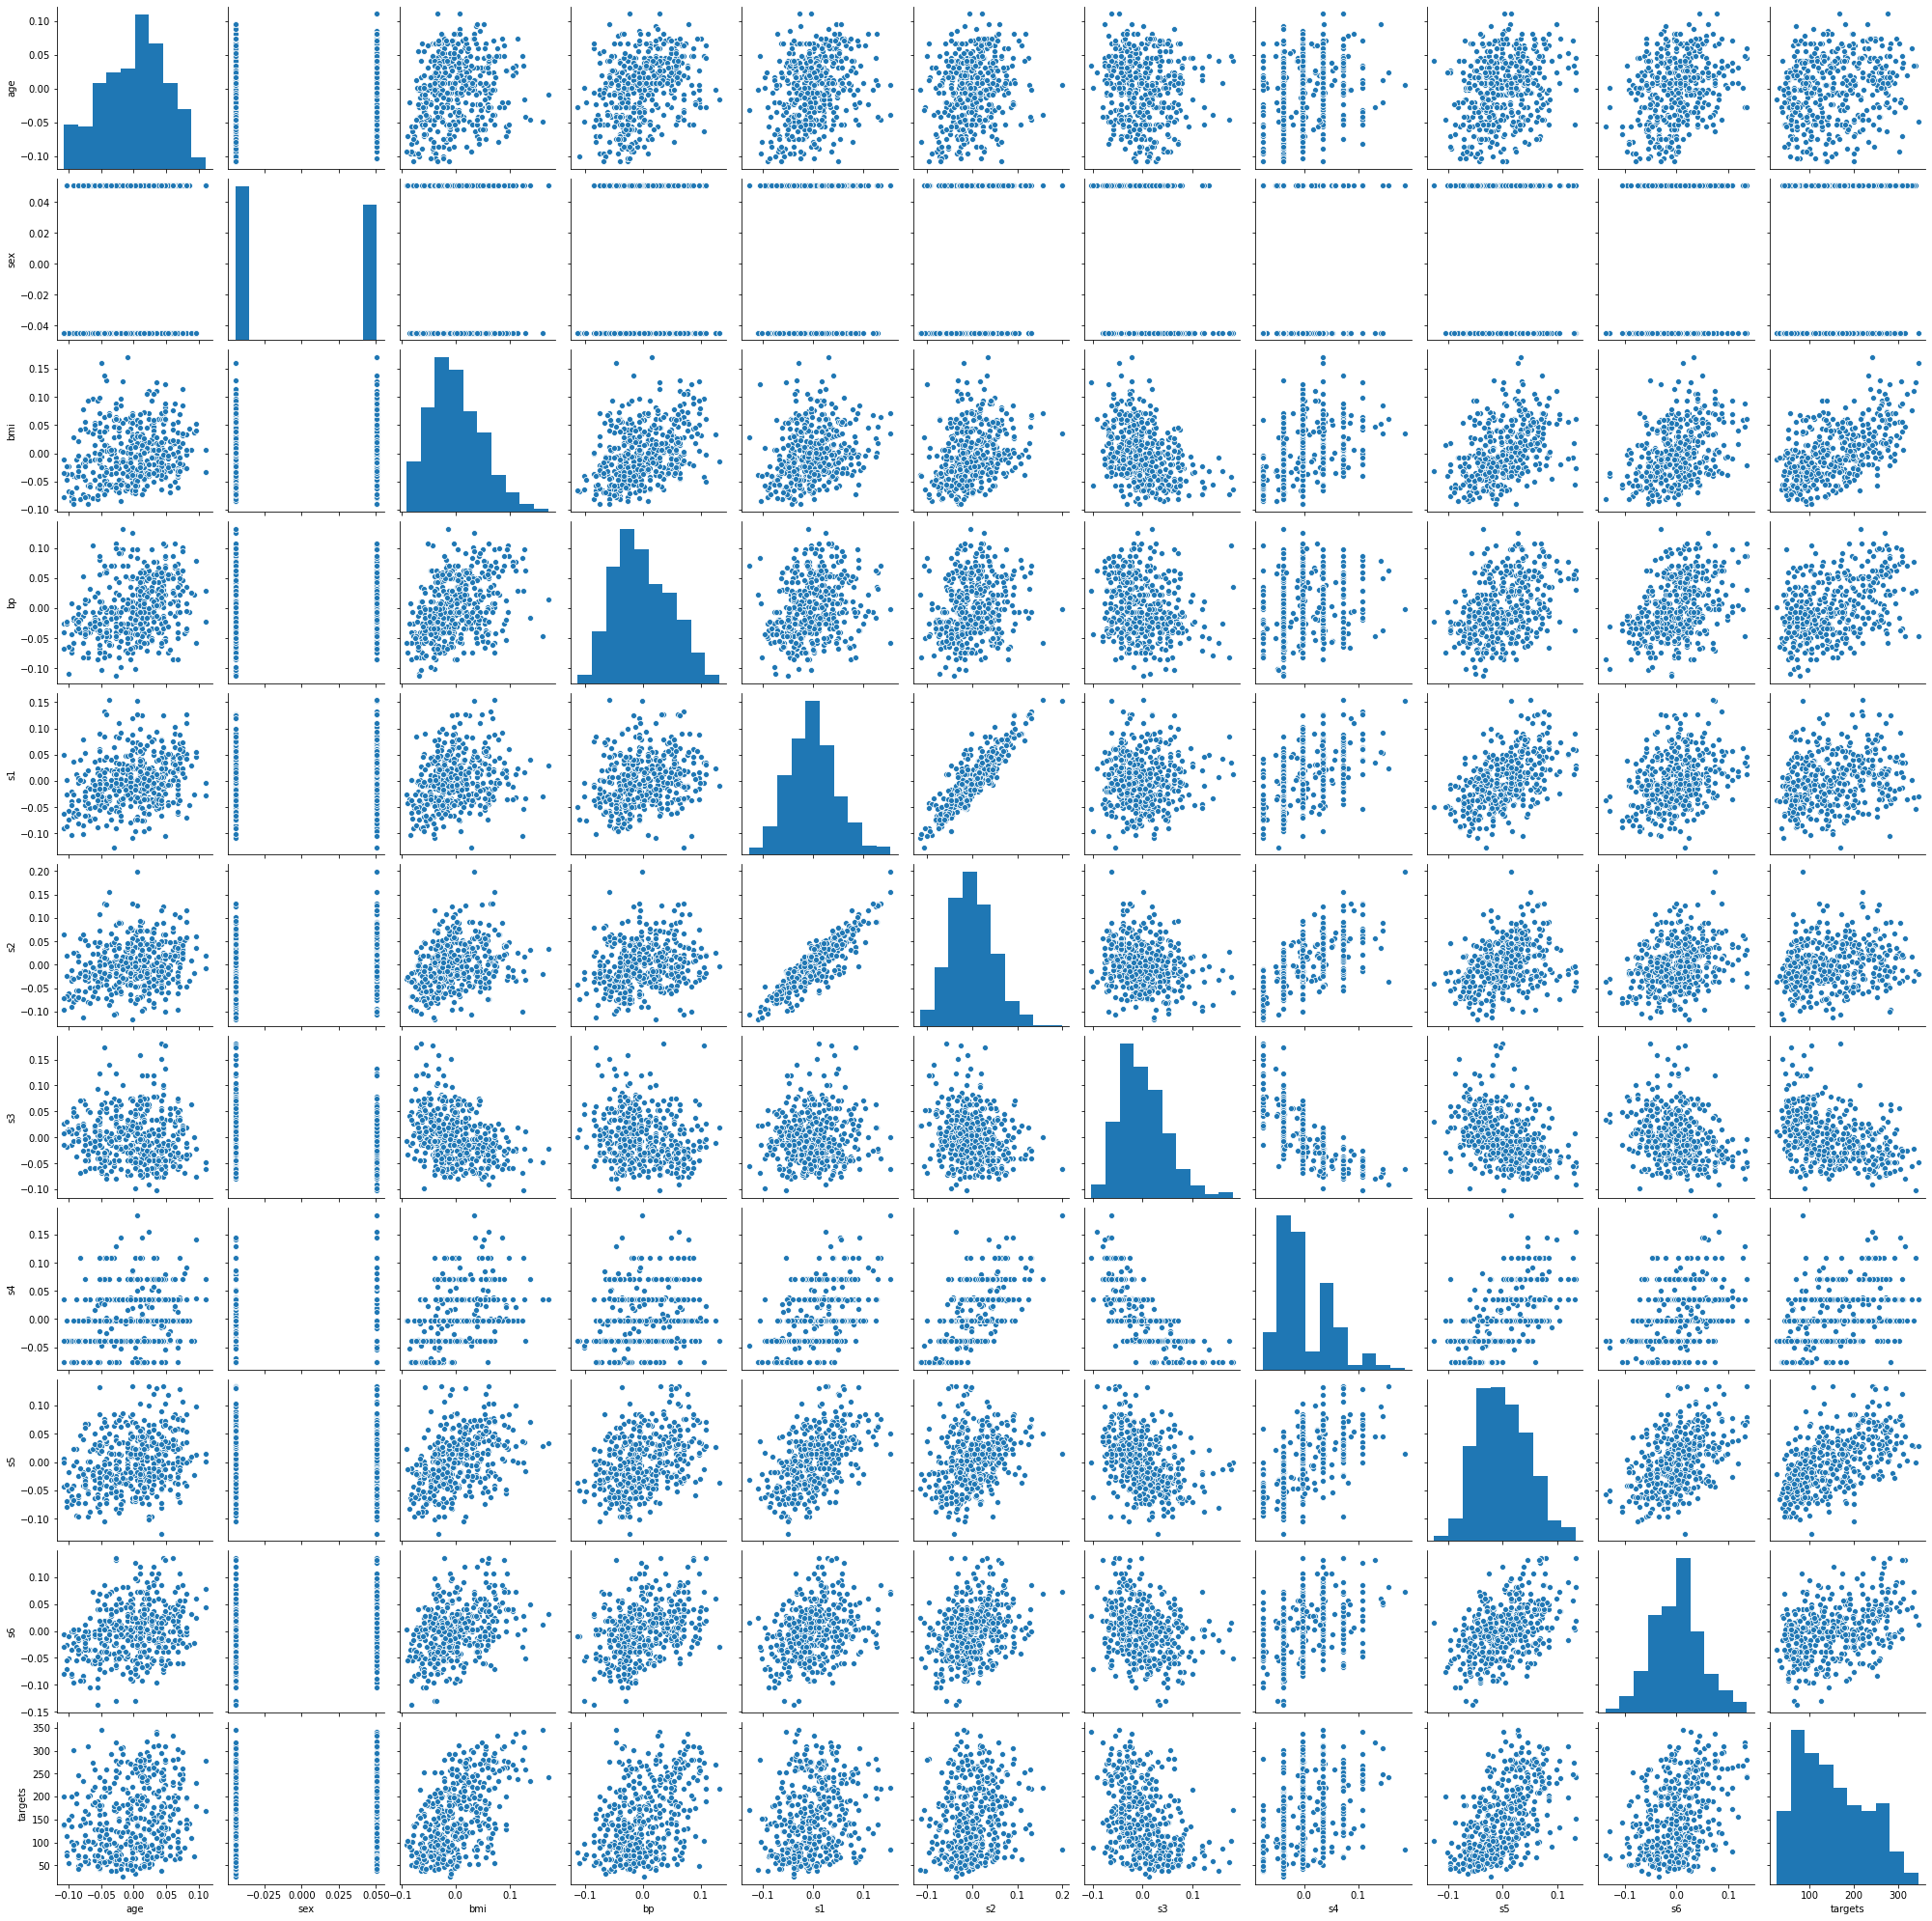

In [9]:
sns.pairplot(df)

## Decision Tree Regressor

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

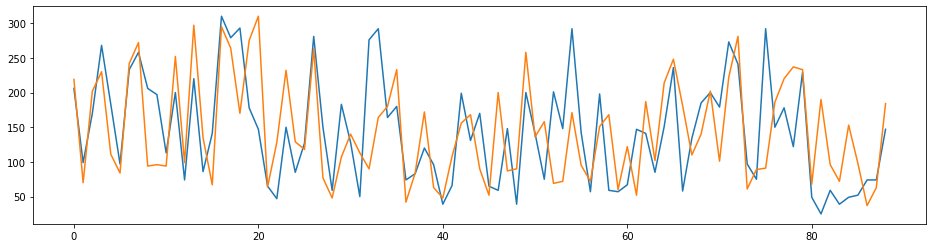

In [12]:
plt.figure(figsize=(16,4))
plt.plot(y_pred)
plt.plot(y_test)

In [13]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

70.61829663921893

In [14]:
y_test.std()

72.78840394263774

## Decision Tree as a Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
iris = datasets.load_iris()

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
X = iris.data
y = iris.target

In [20]:
df = pd.DataFrame(X, columns = iris.feature_names)
df['targets'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


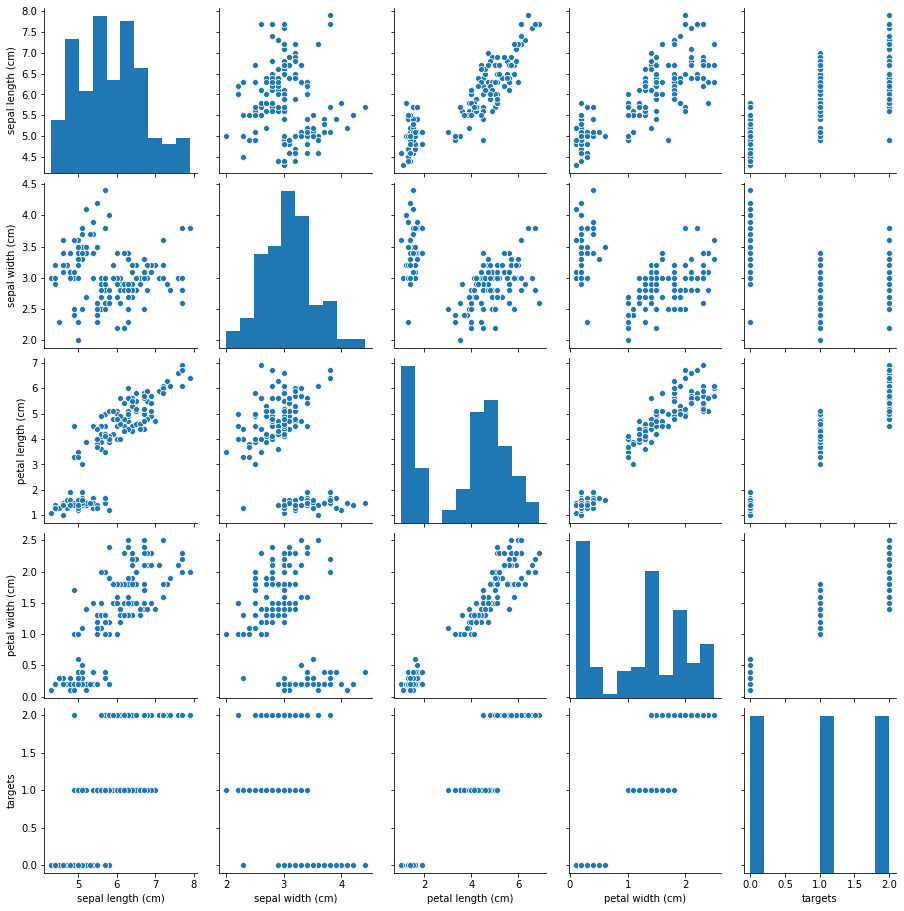

In [21]:
sns.pairplot(df)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [23]:
clf = DecisionTreeClassifier(criterion='gini', random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [24]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9666666666666667


Confusion Matrix
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


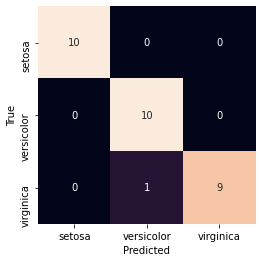

In [27]:
print('Confusion Matrix')
mat = metrics.confusion_matrix(y_test, y_pred)
print(mat)

sns.heatmap(mat, square=True, annot=True, fmt = 'd', cbar=False,
           xticklabels=iris.target_names,
           yticklabels=iris.target_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
print(metrics.classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

